<a href="https://colab.research.google.com/github/KRIOS217/Python_Class_Fall_23/blob/main/Python_Project_3_NYPD_arrest_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to analyze nypd arrest data:
*   pick any zip code/neighborhood/district in this dataset as an initial comparsion point
*  pick a feature/measure/column
*   compare above entity to any other (different) entity - you only need
to do one additional comparison point (but you’re welcome to do
more comparisons if you feel compelled to do so)
*   the analysis should include some descriptive statistics
*   the analysis should include one cleaning task (or more)
*   the analysis should include one visualization (or more)
*   the analysis should include a brief conclusion statement that indicates any bias that may have influenced the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randn
np.random.seed(123)

In [3]:
from dateutil.parser import parse

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYPD_Arrest_Data__Year_to_Date__20231220.csv')

In [5]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [6]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [7]:
df.shape

(170095, 19)

In [8]:
# Locating any columns with null values for data cleaning
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [9]:
# Filter dataset for NaN values in LAW_CAT_CD
dfna = df[df['LAW_CAT_CD'].isna()]
dfna.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
151,261265501,01/03/2023,16,FUGITIVE/OTHER STATES,995.0,FOR OTHER AUTHORITIES,FOA9000016,NaN,M,5,0,25-44,M,WHITE,984984,200115,40.715949,-73.997351,POINT (-73.997351 40.715949)
830,266658303,04/13/2023,16,FUGITIVE/OTHER STATES,995.0,FOR OTHER AUTHORITIES,FOA9000016,NaN,M,18,0,25-44,M,WHITE HISPANIC,992353,216753,40.761610,-73.970750,POINT (-73.97074988 40.76160961)
942,262455915,01/25/2023,49,U.S. CODE UNCLASSIFIED,995.0,FOR OTHER AUTHORITIES,FOA9000049,NaN,K,63,0,18-24,M,BLACK,1004168,169421,40.631677,-73.928239,POINT (-73.928239 40.631677)


In [10]:
#Identifying the crime descriptions for the NaN Level of Offense
dfna['PD_DESC'].unique()

array(['FUGITIVE/OTHER STATES', 'U.S. CODE UNCLASSIFIED',
       'FUGITIVE/OTHER JURISDICTION NYS', 'NYS UNCLASSIFIED',
       'NYS PROBATION', 'NYS PAROLE VIOLATION',
       'NYC UNCLASSIFIED WARRANT', 'F.C.A. ORDER OF PROTECTION'],
      dtype=object)

In [11]:
#Filtering for NaN values in KY_CD to see if there is a way to replace/supplement the missing values utilizing information in other columns.
dfKY = df[df['KY_CD'].isna()]
dfKY.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
70,272143399,07/31/2023,123,(null),NaN,(null),PL 1251401,F,Q,106,0,25-44,M,BLACK,1028604,187929,40.682389,-73.840079,POINT (-73.840079 40.682389)
123,266655043,04/13/2023,777,(null),NaN,(null),PL 1950200,F,K,81,0,45-64,M,BLACK,1005312,190540,40.689640,-73.924051,POINT (-73.924051 40.68964)
10730,266921568,04/19/2023,123,(null),NaN,(null),PL 1251401,F,M,34,0,25-44,F,BLACK HISPANIC,1002161,249364,40.851104,-73.935254,POINT (-73.935254 40.851104)


For data cleaning I decided to drop the rows in the dataset containing NaN / (null) values.

The two justifications for this is that:

1.**LAW_CAT_CD** (Law Offence Codes) could not be located. However, I was able to list the offense descriptions for the various missing codes so the NYPD can locate and update the data at a later point.

2.The missing values in **KY_CD** also has missing values across multiple columns. What is retained is the demographic data and arrest location/timing. Further investigation needs to be done by NYPD as to why these values are missing for particular arrests and updated. In the meantime, dropping the values seems to be the best option.




In [12]:
# Drop any duplicates
df.drop_duplicates(inplace=True)

In [13]:
#Drop NaN values
df0 = df.dropna()

In [14]:
#Checking to see if the nan values have been successfully dropped
df0.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [15]:
#1,270 rows have been removed from original dataset
df0.shape

(168825, 19)

In [16]:
#Total of perpetrators by race for entire dataset
df0.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             81620
WHITE HISPANIC                    42703
BLACK HISPANIC                    16301
WHITE                             16229
ASIAN / PACIFIC ISLANDER           8982
UNKNOWN                            2440
AMERICAN INDIAN/ALASKAN NATIVE      550
Name: PERP_RACE, dtype: int64

In [17]:
#Total of perpetrators by borough for entire dataset
df0.groupby(['ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending=False)

ARREST_BORO
K    46677
B    39687
M    38963
Q    36090
S     7408
Name: ARREST_BORO, dtype: int64

In [18]:
# Identifying a specific crime classification from dataset to analyze.
df0['PD_DESC'].unique()

array(['ASSAULT 2,1,UNCLASSIFIED', 'CONTROLLED SUBSTANCE,SALE 3',
       'STRANGULATION 1ST', 'RAPE 3', 'FORGERY,ETC.,UNCLASSIFIED-FELO',
       'BURGLARY,UNCLASSIFIED,UNKNOWN', 'ARSON 2,3,4', 'ASSAULT 3',
       'ROBBERY,OPEN AREA UNCLASSIFIED', 'LARCENY,PETIT FROM OPEN AREAS,',
       'RAPE 1', 'WEAPONS POSSESSION 3', 'CONSPIRACY 2, 1',
       'HARASSMENT,SUBD 1,CIVILIAN', 'RAPE 2', 'LEWDNESS,PUBLIC',
       'JOSTLING', 'SEXUAL ABUSE', 'IMPERSONATION 2, PUBLIC SERVAN',
       'TRESPASS 3, CRIMINAL', 'ESCAPE 3', 'ARSON 1',
       'MENACING,UNCLASSIFIED', 'TRAFFIC,UNCLASSIFIED MISDEMEAN',
       'LEAVING SCENE-ACCIDENT-PERSONA', 'RECKLESS ENDANGERMENT 2',
       'CONTROLLED SUBSTANCE, POSSESSI', 'SEXUAL ABUSE 3,2',
       'FORGERY,ETC.-MISD.', 'INTOXICATED DRIVING,ALCOHOL',
       'THEFT OF SERVICES, UNCLASSIFIE', 'FORGERY-ILLEGAL POSSESSION,VEH',
       'STOLEN PROPERTY 3,POSSESSION', 'AGGRAVATED HARASSMENT 2',
       'TRAFFIC,UNCLASSIFIED INFRACTIO', 'LARCENY,GRAND FROM PERSON,UNCL',

In [19]:
# Filter dataset by 'RESISTING ARREST'
df2 = df0[(df0['PD_DESC'] == 'RESISTING ARREST')]
df2.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
240,267801392,05/04/2023,750,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2053000,M,B,41,0,25-44,M,BLACK HISPANIC,1015275,240502,40.826743,-73.887897,POINT (-73.88789667 40.82674341)
291,262939177,02/02/2023,750,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2053000,M,Q,113,0,25-44,M,BLACK,1048530,192776,40.695570,-73.768191,POINT (-73.768191 40.69557)
312,262504468,01/25/2023,750,RESISTING ARREST,359.0,OFFENSES AGAINST PUBLIC ADMINI,PL 2053000,M,K,79,2,18-24,M,BLACK,1000301,192923,40.696192,-73.942116,POINT (-73.942116 40.696192)


In [20]:
# Selecting relevant columns only
df3 = df2[['ARREST_DATE','PD_DESC','ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', ]]
df3.head()

,ARREST_DATE,PD_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
240,05/04/2023,RESISTING ARREST,B,41,25-44,M,BLACK HISPANIC
291,02/02/2023,RESISTING ARREST,Q,113,25-44,M,BLACK
312,01/25/2023,RESISTING ARREST,K,79,18-24,M,BLACK
559,05/04/2023,RESISTING ARREST,B,42,25-44,M,BLACK
586,02/09/2023,RESISTING ARREST,B,45,<18,M,BLACK


In [21]:
# Total number of perpetrators by race who were classified as 'Resisting arrest'
df3.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

PERP_RACE
BLACK                             917
WHITE HISPANIC                    297
BLACK HISPANIC                    130
WHITE                              81
ASIAN / PACIFIC ISLANDER           37
UNKNOWN                            30
AMERICAN INDIAN/ALASKAN NATIVE      2
Name: PERP_RACE, dtype: int64

In [22]:
# Total number of perpetrators by sex who were classified as 'Resisting arrest'
df3.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
M    1249
F     211
U      34
Name: PERP_SEX, dtype: int64

In [23]:
# Total number of perpetrators by age group who were classified as 'Resisting arrest'
df3.groupby(['AGE_GROUP'])['AGE_GROUP'].count().sort_values(ascending=False)

AGE_GROUP
25-44    944
18-24    376
45-64    128
<18       42
65+        4
Name: AGE_GROUP, dtype: int64

In [24]:
# Total number of perpetrators by borough who were classified as 'Resisting arrest'
df3.groupby(['ARREST_BORO'])['ARREST_BORO'].count().sort_values(ascending=False)

ARREST_BORO
K    452
M    368
Q    307
B    298
S     69
Name: ARREST_BORO, dtype: int64

In [25]:
# Filter dataset for Brooklyn, as it is the borough with the highest number of 'Resisting arrest' records
dfK = df3[(df['ARREST_BORO'] == 'K')]
dfK.head(5)

<ipython-input-25-7527f3083401>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfK = df3[(df['ARREST_BORO'] == 'K')]


,ARREST_DATE,PD_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
312,01/25/2023,RESISTING ARREST,K,79,18-24,M,BLACK
1127,02/01/2023,RESISTING ARREST,K,90,25-44,M,BLACK
3920,04/07/2023,RESISTING ARREST,K,75,25-44,M,BLACK HISPANIC
4443,02/12/2023,RESISTING ARREST,K,75,25-44,F,WHITE HISPANIC
5268,04/13/2023,RESISTING ARREST,K,75,25-44,M,BLACK


In [108]:
# Total number of Brooklyn based perpetrators by race who were classified as 'Resisting arrest'
dfK.groupby(['PERP_RACE'])['PERP_RACE'].count().sort_values(ascending=False)

PERP_RACE
BLACK                       338
WHITE HISPANIC               52
WHITE                        28
BLACK HISPANIC               23
ASIAN / PACIFIC ISLANDER      7
UNKNOWN                       4
Name: PERP_RACE, dtype: int64

In [109]:
# Total number of Brooklyn based perpetrators by sex who were classified as 'Resisting arrest'
dfK.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
M    383
F     59
U     10
Name: PERP_SEX, dtype: int64

In [27]:
# Total number of Brooklyn based perpetrators by age group who were classified as 'Resisting arrest'
dfK.groupby(['AGE_GROUP'])['AGE_GROUP'].count().sort_values(ascending=False)

AGE_GROUP
25-44    284
18-24    122
45-64     34
<18       11
65+        1
Name: AGE_GROUP, dtype: int64

In [28]:
#Identifying if column values contain integers or string data
dfK.dtypes

ARREST_DATE        object
PD_DESC            object
ARREST_BORO        object
ARREST_PRECINCT     int64
AGE_GROUP          object
PERP_SEX           object
PERP_RACE          object
dtype: object

In [38]:
# Spliting the date into 3 seperate columns
dfK[["month", "day", "year"]] = dfK["ARREST_DATE"].str.split("/" , expand = True)

<ipython-input-38-99b9552607c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfK[["month", "day", "year"]] = dfK["ARREST_DATE"].str.split("/" , expand = True)


In [45]:
# Checking to see if the values were split successfully
dfK.head()

,ARREST_DATE,PD_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,day,month,year
312,01/25/2023,RESISTING ARREST,K,79,18-24,M,BLACK,25,01,2023
1127,02/01/2023,RESISTING ARREST,K,90,25-44,M,BLACK,01,02,2023
3920,04/07/2023,RESISTING ARREST,K,75,25-44,M,BLACK HISPANIC,07,04,2023
4443,02/12/2023,RESISTING ARREST,K,75,25-44,F,WHITE HISPANIC,12,02,2023
5268,04/13/2023,RESISTING ARREST,K,75,25-44,M,BLACK,13,04,2023


In [54]:
df_int['month'].unique()

array([1, 2, 4, 5, 3, 6, 8, 7, 9])

In [55]:
df_int['year'].unique()

array([2023])

In [43]:
# Converting object values for the 3 new columns into integers
df_int = dfK.astype({"month":'int64', "day":'int64',"year":'int64'})

In [44]:
df_int.dtypes

ARREST_DATE        object
PD_DESC            object
ARREST_BORO        object
ARREST_PRECINCT     int64
AGE_GROUP          object
PERP_SEX           object
PERP_RACE          object
day                 int64
month               int64
year                int64
dtype: object

In [88]:
# Finding the total 'Resisting arrests' recorded in the dataset by month
df_month = df_int.groupby(['month'])['month'].count()
df_month

month
1    44
2    36
3    42
4    59
5    56
6    56
7    44
8    59
9    56
Name: month, dtype: int64

In [106]:
color=['lightcoral','indianred','brown','firebrick','maroon','rosybrown','red','mistyrose','salmon']

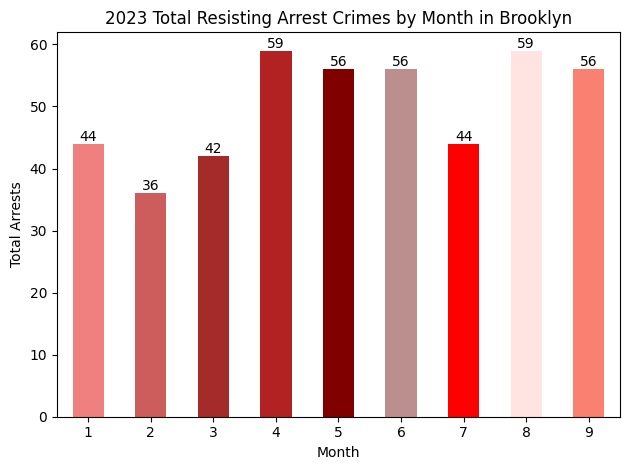

In [107]:
#Include a data visualization of the amount of arrests by month for Brooklyn Based prepetrators who were classified as 'Resisting arrest'
ax = df_month.plot(kind='bar', x='month', y='total arrests', legend=False, rot=0,
                 title='2023 Total Resisting Arrest Crimes by Month in Brooklyn',
                 xlabel='Month',
                 ylabel='Total Arrests',
                   color=color)
ax.bar_label(ax.containers[0], label_type='edge')
plt.tight_layout()

**Conclusion statement: ** From this data analysis, we can conclude that the majority of indiviuals arrested in this dataset from 2023 for "Resisting Arrest" are Black, Male, and Age Group 25-44.

Brooklyn has the highest reported of total "Resisting Arrest" crimes out of the NYC boroughs.

We can see from the visualization, a majority of "Resisting Arrest" crimes that were reported in Brooklyn took place in April (4) and August (8) during the 2023 year.

Some bias to consider about the dataset: Missing values in the dataset were dropped from analysis. These omitted records would impact data conclusions.

We do not have records for the rest of the 2023 year (Oct,Nov,Dec), so this is an incomplete dataset that is supposed to represent the entirety of recorded crimes by NYPD during the "2023 year"



